# Snipping letters from posters

This notebook will extract letters from old posters using [Tesseract](https://github.com/tesseract-ocr/tesseract).

First, let's download and show an image:

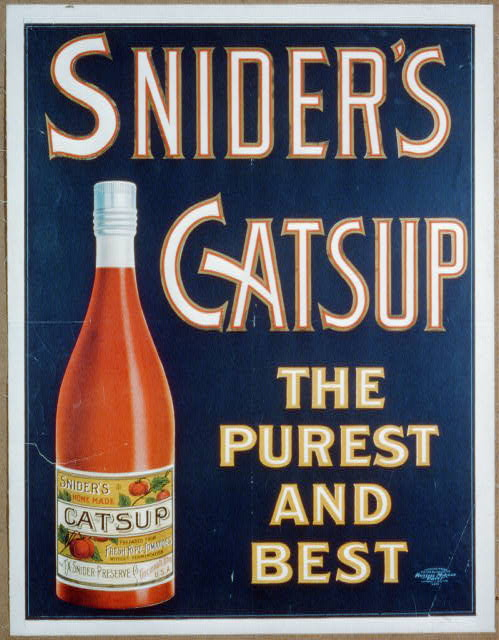

In [1]:
from IPython.display import display
from io_helpers import *

# Source: https://www.loc.gov/resource/cph.3b48160/
image_url = "https://tile.loc.gov/storage-services/service/pnp/cph/3b40000/3b48000/3b48100/3b48160r.jpg"
im = get_image_from_url(image_url)
display(im)

Next let's perform OCR and get bounding box data

2 characters found, and 0 letters found.


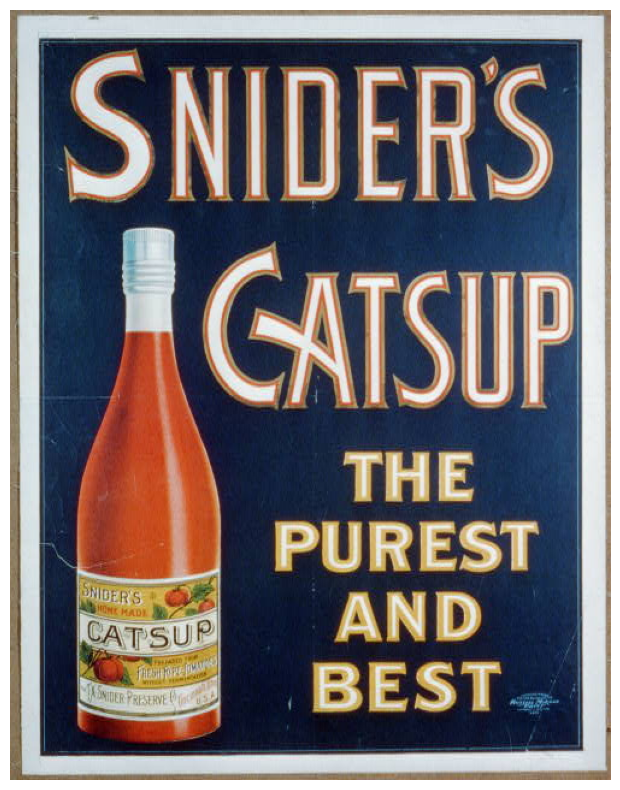

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patches
import pytesseract

# Get bounding boxes of letters
w, h = im.size
ocr_data = pytesseract.image_to_boxes(im)
char_data = [tuple(line.split(' ')) for line in ocr_data.splitlines()]
chars = [(char, int(x0), h - int(y1), int(x1), h - int(y0)) for char, x0, y0, x1, y1, _ in char_data]
# Only retrieve letters
letters = [char for char in chars if char[0].isalpha()]
print(f"{len(char_data)} characters found, and {len(letters)} letters found.")

fig, ax = plt.subplots(1, 1, figsize=(30, 10))
ax.imshow(im)
ax.axis('off')
for char, x0, y0, x1, y1 in letters:
    box = patches.Rectangle(
        (x0, y0), x1 - x0, y1 - y0, edgecolor="red", facecolor="none"
    )
    ax.add_patch(box)
    ax.annotate(
        char,
        (x0 + 2, y0 + 2),
        fontsize = 20,
        fontweight = "bold",
        color = "red",
        verticalalignment = "top"
    )
plt.show()

Cut out each letter and paste them in a grid.

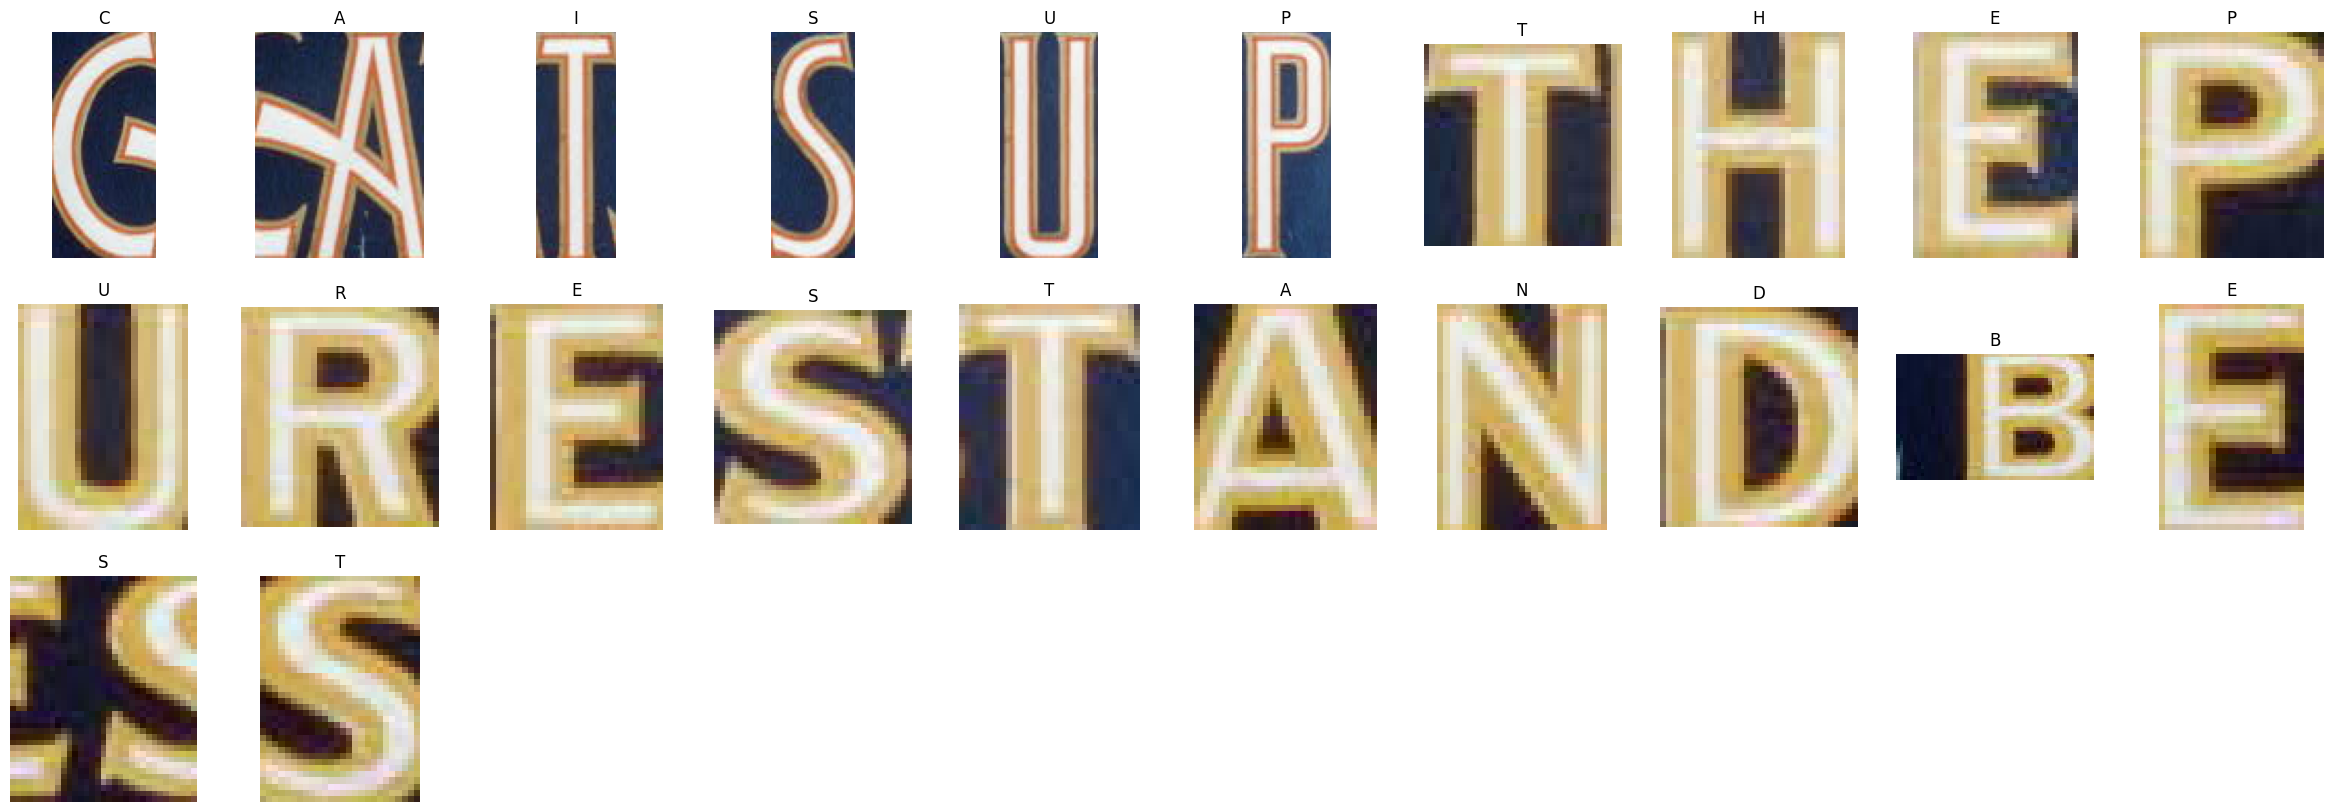

In [ ]:
import math

letters_per_row = 10
rows = int(math.ceil(1.0 * len(letters) / letters_per_row))
fig, ax = plt.subplots(rows, letters_per_row, figsize=(30, 10))
axes = list(ax.flat)
cells = letters_per_row * rows
for i in range(cells):
    if i < len(letters):
        letter = letters[i]
        char, x0, y0, x1, y1 = letter
        clip = im.crop((x0, y0, x1, y1))
        axes[i].imshow(clip)
        axes[i].set_title(char)
    axes[i].axis('off')
plt.show()